In [366]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [798]:
def theta():
    if p2[1] >= 50:
        return math.pi / 2
    else: 
        return math.atan((p1[0] - p2[0]) / (p1[1] - p2[1]))

def update_p1(t):
    p1[0] += (v1[0] * t)
    
def update_p2(t):
    p2[0] += (v2[0] * t) 
    p2[1] += (v2[1] * t)
    
def update_v2(t):
    v2[0] = x * math.sin(theta())
    v2[1] = x * math.cos(theta())
    
def initialize_vars():
    x = 9.39 # initial speed guess = yards / sec

    p1 = [0,50]
    v1 = [7.33,0]

    p2 = [0,0]
    v2 = [0, x]


    x_1 = []
    y_1 = []

    x_2 = []
    y_2 = []
    
    thetas = []
    
    step = 1/10000
    
    return x, p1, v1, p2, v2, x_1, y_1, x_2, y_2, thetas, step


In [803]:
# mph to yard / sec -- 15mph * 0.488889 = 7.333335 yards / second

max_x = []

for i in np.arange(9.35,9.4,.001):
    x, p1, v1, p2, v2, x_1, y_1, x_2, y_2, thetas, step = initialize_vars()
    x = i

    while p1[0] <= 100:
        x_1.append(p1[0])
        y_1.append(p1[1])
        x_2.append(p2[0])
        y_2.append(p2[1])  
        thetas.append(theta())

        update_p1(step)
        update_p2(step)
        update_v2(step)  

    max_x.append((i,max(x_2)))
    
# current best: 9.388

In [807]:
[a for a in max_x if a[1] <= 100.01 and a[1] >= 99.99]

[(9.387999999999979, 99.99806306775044)]

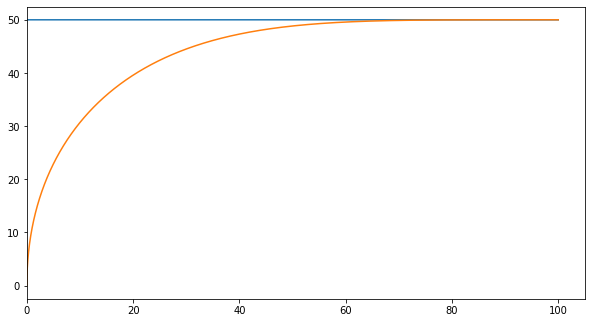

In [809]:
x, p1, v1, p2, v2, x_1, y_1, x_2, y_2, thetas, step = initialize_vars()
x = 9.388 # current_best answer
while p1[0] <= 100:
    x_1.append(p1[0])
    y_1.append(p1[1])
    x_2.append(p2[0])
    y_2.append(p2[1])  
    thetas.append(theta())

    update_p1(step)
    update_p2(step)
    update_v2(step)  

max_x.append((i,max(x_2)))

fig, ax = plt.subplots(figsize=(10,10));
ax.set_aspect('equal');
ax.set_xlim(0,105);
plt.plot(x_1,y_1);
plt.plot(x_2,y_2);

<IPython.core.display.Javascript object>


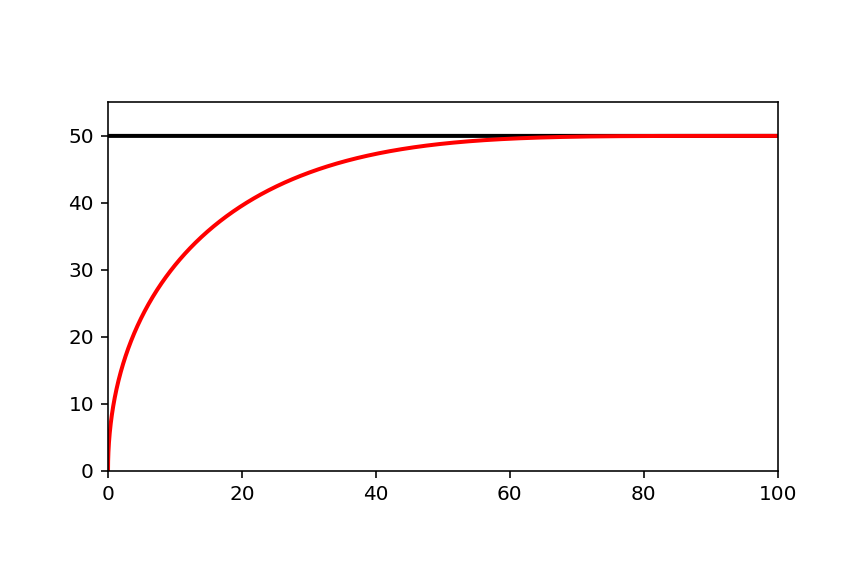

In [921]:
from matplotlib import animation

fig = plt.figure()
ax1 = plt.axes(xlim=(0, 100), ylim=(0,55))
ax1.set_aspect('equal');
line, = ax1.plot([], [], lw=2)

plotlays, plotcols = [2], ["black","red"]
lines = []
for index in range(2):
    lobj = ax1.plot([],[],lw=2,color=plotcols[index])[0]
    lines.append(lobj)

def init():
    for line in lines:
        line.set_data([],[])
    return lines

x1,y1 = [],[]
x2,y2 = [],[]

def animate(i):

    x = x_1[::100][i]
    y = y_1[::100][i]
    x1.append(x)
    y1.append(y)

    x = x_2[::100][i]
    y = y_2[::100][i]
    x2.append(x)
    y2.append(y)

    xlist = [x1, x2]
    ylist = [y1, y2]

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=5000, interval=1, blit=True)


plt.show()